In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
train= pd.read_csv('Train_Data.csv')
x_test= pd.read_csv('Test_Data.csv')

In [205]:
train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [207]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         318 non-null    object 
 1   campaign     318 non-null    object 
 2   adgroup      318 non-null    object 
 3   ad           318 non-null    object 
 4   cost         318 non-null    float64
 5   impressions  318 non-null    int64  
 6   clicks       318 non-null    int64  
 7   conversions  318 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 20.0+ KB


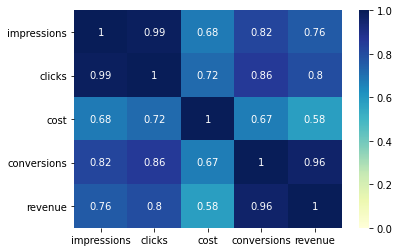

In [208]:
sns.heatmap(train.corr(),annot=True, vmin=0, vmax=1,cmap="YlGnBu")
plt.show()

In [209]:
train.describe(percentiles= [0.99,.999],include= 'all')

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
count,4571,4571,4571,4571,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
unique,212,1,4,70,NaN,NaN,NaN,NaN,NaN
top,30-10-2020,campaign 1,adgroup 3,ad 3,NaN,NaN,NaN,NaN,NaN
freq,35,4571,1672,617,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,92.635747,43.340844,2.800834,1.339094,231.865340
std,NaN,NaN,NaN,NaN,198.349737,100.164913,14.361618,5.223922,1091.742763
min,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,16.000000,7.000000,0.210000,0.000000,0.000000
99%,NaN,NaN,NaN,NaN,822.300000,391.800000,40.402000,19.000000,3478.108000
99.9%,NaN,NaN,NaN,NaN,1974.800000,1109.450000,205.189100,80.290000,17429.780900


In [210]:
train.columns

Index(['date', 'campaign', 'adgroup', 'ad', 'impressions', 'clicks', 'cost',
       'conversions', 'revenue'],
      dtype='object')

In [211]:
trainv=train[['adgroup', 'impressions', 'clicks', 'cost','conversions','revenue']]
trainv.head()

,adgroup,impressions,clicks,cost,conversions,revenue
0,adgroup 1,24,6,0.08,0,0.00
1,adgroup 2,1,0,0.00,0,0.00
2,adgroup 3,13,4,0.04,0,0.00
3,adgroup 4,5,4,0.08,0,0.00
4,adgroup 1,247,126,1.29,4,925.71


<AxesSubplot:xlabel='adgroup', ylabel='revenue'>

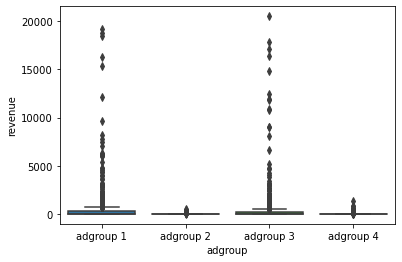

In [212]:
sns.boxplot(x=trainv.adgroup,y=train.revenue)

In [213]:
trainv['adgroup'].value_counts(normalize=True)

adgroup 3    0.365784
adgroup 1    0.287464
adgroup 4    0.187705
adgroup 2    0.159046
Name: adgroup, dtype: float64

In [214]:
group = pd.get_dummies(trainv['adgroup'], drop_first = True)
trainv = pd.concat([trainv, group], axis = 1)

In [215]:
trainv.drop('adgroup',axis=1, inplace=True)

In [216]:
y_train = trainv.pop('revenue')
x_train = trainv

In [217]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

lr.params

const          -23.267702
impressions     -1.481413
clicks           2.792762
cost            -9.455975
conversions    219.770586
adgroup 2       23.739515
adgroup 3      -12.611661
adgroup 4       23.189130
dtype: float64

In [218]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.016e+04
Date:                Sat, 03 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:57:56   Log-Likelihood:                -32042.
No. Observations:                4571   AIC:                         6.410e+04
Df Residuals:                    4563   BIC:                         6.415e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -23.2677      8.741     -2.662      0.008     -40.403      -6.132
impressions    -1.4814      0.146    -10.142      0.000      -1.768      -1.195
clicks          2.7928      0.324      8.613      0.000       2.157       3.428
cost           -9.4560      0.416    -22.707      0.000     -10.272      -8.640
conversions   219.7706      1.565    140.436      0.000     216.703     222.839
adgroup 2      23.7395     13.177      1.802      0.072      -2.094      49.573
adgroup 3     -12.6117     10.524     -1.198      0.231     -33.243       8.020
adgroup 4      23.1891     12.618      1.838      0.066      -1.547      47.926
==============================================================================
Omnibus:                     5177.655   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2953295.825
Skew:                           5.133   Prob(JB):                         0.00
Kurtosis:                     127.100   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,clicks,73.80
0,impressions,56.09
3,conversions,4.52
2,cost,2.36
5,adgroup 3,1.20
4,adgroup 2,1.00
6,adgroup 4,1.00


In [220]:
#removing clicks
train_new=trainv.drop('clicks',axis=1)

In [221]:
X_train_lm = sm.add_constant(train_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.166e+04
Date:                Sat, 03 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:58:03   Log-Likelihood:                -32079.
No. Observations:                4571   AIC:                         6.417e+04
Df Residuals:                    4564   BIC:                         6.422e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -43.5171      8.486     -5.128      0.000     -60.153     -26.881
impressions    -0.2695      0.040     -6.818      0.000      -0.347      -0.192
cost           -8.2964      0.397    -20.887      0.000      -9.075      -7.518
conversions   225.8288      1.409    160.265      0.000     223.066     228.591
adgroup 2      43.1597     13.087      3.298      0.001      17.504      68.816
adgroup 3      16.9221     10.029      1.687      0.092      -2.739      36.584
adgroup 4      43.2994     12.499      3.464      0.001      18.796      67.803
==============================================================================
Omnibus:                     5432.030   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3276628.584
Skew:                           5.619   Prob(JB):                         0.00
Kurtosis:                     133.681   Cond. No.                         995.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = train_new.columns
vif['VIF'] = [variance_inflation_factor(train_new.values, i) for i in range(train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,impressions,3.83
2,conversions,3.49
1,cost,2.09
4,adgroup 3,1.15
3,adgroup 2,1.00
5,adgroup 4,1.00


In [223]:
#removing adgroup 3
x_train_new=train_new.drop('adgroup 3',axis=1)
X_train_lm = sm.add_constant(x_train_new)

lr_fin = sm.OLS(y_train, X_train_lm).fit()
lr_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Sat, 03 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:58:16   Log-Likelihood:                -32080.
No. Observations:                4571   AIC:                         6.417e+04
Df Residuals:                    4565   BIC:                         6.421e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.4076      6.010     -5.558      0.000     -45.191     -21.625
impressions    -0.2763      0.039     -7.025      0.000      -0.353      -0.199
cost           -8.2856      0.397    -20.858      0.000      -9.064      -7.507
conversions   225.9584      1.407    160.563      0.000     223.199     228.717
adgroup 2      33.0816     11.646      2.841      0.005      10.249      55.914
adgroup 4      33.2137     10.979      3.025      0.002      11.690      54.738
==============================================================================
Omnibus:                     5440.713   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3287857.912
Skew:                           5.636   Prob(JB):                         0.00
Kurtosis:                     133.904   Cond. No.                         738.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,impressions,3.46
2,conversions,3.45
1,cost,2.07
3,adgroup 2,1.00
4,adgroup 4,1.00


In [225]:
y_train_rev = lr_fin.predict(X_train_lm)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

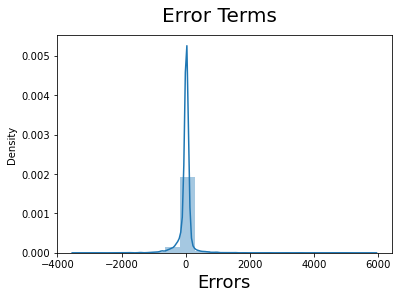

In [226]:
fig = plt.figure()
sns.distplot((y_train - y_train_rev), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [227]:
x_test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [228]:
testv=x_test[['adgroup', 'impressions', 'clicks', 'cost','conversions']]
group = pd.get_dummies(testv['adgroup'], drop_first = True)
testv = pd.concat([testv, group], axis = 1)

In [229]:
testv.drop('adgroup',axis=1, inplace=True)

In [230]:
testv.head()

,impressions,clicks,cost,conversions,adgroup 2,adgroup 3,adgroup 4
0,121,49,0.58,1,0,0,0
1,22,12,0.17,0,0,1,0
2,5,3,0.05,0,0,0,1
3,2,1,0.01,0,1,0,0
4,3,1,0.01,0,1,0,0


In [233]:
testv.describe()

,impressions,clicks,cost,conversions,adgroup 2,adgroup 3,adgroup 4
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,67.144654,29.720126,0.381352,0.805031,0.198113,0.349057,0.169811
std,101.078870,45.200014,0.591480,1.802480,0.399206,0.477423,0.376059
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,0.020000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,9.000000,0.105000,0.000000,0.000000,0.000000,0.000000
75%,103.000000,40.750000,0.490000,1.000000,0.000000,1.000000,0.000000
max,589.000000,276.000000,3.530000,15.000000,1.000000,1.000000,1.000000


In [234]:
testv_new = sm.add_constant(testv)

In [235]:
testv_new = testv_new.drop(['adgroup 3','clicks'], axis = 1)

In [236]:
revenue = lr_fin.predict(testv_new)

In [241]:
revenue.loc[revenue<0] = 0

In [245]:
revenue.to_excel("W6 sub1.xlsx") 